In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

data= pd.read_csv('Clicked Ads Dataset.csv', index_col=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Male                      997 non-null    object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 85.9+ KB


In [2]:
data.sample(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
891,54.39,20,367942540.0,171.90,Laki-Laki,2/29/2016 18:06,Yes,Tangerang Selatan,Banten,Finance
660,42.04,49,471261000.0,182.11,Perempuan,2/3/2016 16:54,Yes,Banjarmasin,Kalimantan Selatan,Finance
522,79.16,32,486937220.0,202.90,Laki-Laki,3/30/2016 20:23,No,Padang,Sumatra Barat,Otomotif
583,68.60,33,479142580.0,135.08,Perempuan,2/17/2016 18:50,Yes,Surabaya,Jawa Timur,Health
97,39.94,41,454490330.0,156.30,Perempuan,1/8/2016 22:47,Yes,Surabaya,Jawa Timur,Electronic


### Mengatasi Data Null dan mengganti value yang tidak sesuai

In [3]:
data.isnull().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [4]:
## terdapat 4 kolom yang memiliki nilai kosong 

# untuk Daily Time Spent on Site, area income, daily internet usage kita bisa menggunakan median
data['Area Income'] = data['Area Income'].fillna(data['Area Income'].median())
data['Daily Internet Usage'] = data['Daily Internet Usage'].fillna(data['Daily Internet Usage'].median())
data['Daily Time Spent on Site'] = data['Daily Time Spent on Site'].fillna(data['Daily Time Spent on Site'].median())

# untuk kolom male kita bisa isi dengan unknow
data['Male']=data['Male'].fillna('Unknown')

In [5]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Time'] = data['Timestamp'].dt.time
data['Date'] = data['Timestamp'].dt.date
data['years'] = data['Timestamp'].dt.year
data['month'] = data['Timestamp'].dt.month
data = data.drop(columns='Timestamp',axis =1)
data.set_index('Date', inplace=True)

In [6]:
data.sample(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,city,province,category,Time,years,month
Date,,,,,,,,,,,,
2016-01-29,73.27,32,469794220.0,234.75,Laki-Laki,No,Jakarta Utara,Daerah Khusus Ibukota Jakarta,Bank,20:16:00,2016,1
2016-02-24,83.98,36,478141370.0,194.62,Perempuan,No,Malang,Jawa Timur,Otomotif,00:44:00,2016,2
2016-06-11,81.90,41,467416810.0,225.47,Perempuan,No,Jakarta Selatan,Daerah Khusus Ibukota Jakarta,Finance,06:47:00,2016,6
2016-07-12,70.39,32,331501730.0,261.52,Laki-Laki,No,Bandar Lampung,Lampung,Fashion,10:56:00,2016,7
2016-02-05,68.10,40,524323870.0,227.73,Laki-Laki,No,Tasikmalaya,Jawa Barat,Food,16:50:00,2016,2


## Feature Encoding

In [7]:
categorical =['Male','Clicked on Ad','city','province','category']
numeric = ['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']

In [8]:
for col in categorical:
    print(f'value counts of column {col}')
    print(data[col].value_counts())
    print(f'Number Col Uniq : ',data[col].nunique())
    print('---'*10,'\n')

value counts of column Male
Male
Perempuan    518
Laki-Laki    479
Unknown        3
Name: count, dtype: int64
Number Col Uniq :  3
------------------------------ 

value counts of column Clicked on Ad
Clicked on Ad
No     500
Yes    500
Name: count, dtype: int64
Number Col Uniq :  2
------------------------------ 

value counts of column city
city
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tangerang Selatan    33
Tangerang            32
Depok                30
Bandar Lampung       29
Bogor                28
Jakarta Pusat        27
Malang               26
Banjarmasin          23
Pakanbaru            23
Denpasar             21
Padang               19
Balikpapan           18
Cimahi               17
Samarinda            16
Tasikmalaya          15
Po

In [9]:
## melakukan feature encoding
from sklearn.preprocessing import LabelEncoder
label =LabelEncoder()
data['province'] = label.fit_transform(data['province'])
data['category'] = label.fit_transform(data['category'])
data['Male'] = label.fit_transform(data['Male'])
data['Clicked on Ad'] = label.fit_transform(data['Clicked on Ad'])
data['city'] = label.fit_transform(data['city'])
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,city,province,category,Time,years,month
Date,,,,,,,,,,,,
2016-03-27,68.95,35,432837300.0,256.09,1,0,13,2,5,00:53:00,2016,3
2016-04-04,80.23,31,479092950.0,193.77,0,0,8,0,4,01:39:00,2016,4
2016-03-13,69.47,26,418501580.0,236.50,1,0,25,5,1,20:35:00,2016,3
2016-01-10,74.15,29,383643260.0,245.89,0,0,4,9,7,02:31:00,2016,1
2016-06-03,68.37,35,517229930.0,225.58,1,0,17,15,3,03:36:00,2016,6
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-11,72.97,30,499691990.0,208.58,0,1,23,4,3,21:49:00,2016,2
2016-04-22,51.30,45,474475190.0,134.42,0,1,19,11,1,02:07:00,2016,4
2016-02-01,68.11,51,296910040.0,120.37,0,1,22,8,9,17:24:00,2016,2


In [10]:
df = data.copy()

## before Standarization 

In [11]:
import time 
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.model_selection import KFold,GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,f1_score,roc_auc_score,roc_curve,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

### Split test 70:30

In [12]:
from sklearn.model_selection import train_test_split
X = df.drop(['Clicked on Ad','Time'], axis=1)
y= df['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

### Logistic Regression

In [13]:
LR = LogisticRegression(random_state=42)
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
print('Acccuracy:', accuracy_score(y_pred,y_test))

# Evaluasi Model 
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# menampilkan hasil 
print('Confusion Matrik: ')
print(confusion_mat)
print("--------------------------------------------------------------------")
print('Acccuracy:', accuracy_score(y_pred,y_test))
print()
print(classification_rep)

Acccuracy: 0.4866666666666667
Confusion Matrik: 
[[146   0]
 [154   0]]
--------------------------------------------------------------------
Acccuracy: 0.4866666666666667

              precision    recall  f1-score   support

           0       0.49      1.00      0.65       146
           1       0.00      0.00      0.00       154

    accuracy                           0.49       300
   macro avg       0.24      0.50      0.33       300
weighted avg       0.24      0.49      0.32       300



### Desicion Tree Classifier

In [14]:
clf_tree = DecisionTreeClassifier(criterion='entropy',random_state=42,max_depth=50, min_samples_leaf=100)
clf_tree.fit(X_train,y_train)
y_pred = clf_tree.predict(X_test)

# Evaluasi Model 
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# menampilkan hasil 
print('Confusion Matrik: ')
print(confusion_mat)
print("--------------------------------------------------------------------")
print('Acccuracy:', accuracy_score(y_pred,y_test))
print()
print(classification_rep)

Confusion Matrik: 
[[129  17]
 [ 23 131]]
--------------------------------------------------------------------
Acccuracy: 0.8666666666666667

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       146
           1       0.89      0.85      0.87       154

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



### Random Forest Classifier

In [15]:
radm_clf =RandomForestClassifier(criterion='gini',n_estimators=100,random_state=42)
radm_clf.fit(X_train,y_train)
y_pred = radm_clf.predict(X_test)
# Evaluasi Model 
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# menampilkan hasil 
print('Confusion Matrik: ')
print(confusion_mat)
print("--------------------------------------------------------------------")
print('Acccuracy:', accuracy_score(y_pred,y_test))
print()
print(classification_rep)

Confusion Matrik: 
[[140   6]
 [  7 147]]
--------------------------------------------------------------------
Acccuracy: 0.9566666666666667

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       146
           1       0.96      0.95      0.96       154

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



### Ada Boost Classifier

In [16]:
abd = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                        random_state=42,
                        learning_rate=1.0,
                        algorithm="SAMME.R",
                        n_estimators=50)
abd.fit(X_train,y_train)
y_pred = abd.predict(X_test)
# Evaluasi Model 
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# menampilkan hasil 
print('Confusion Matrik: ')
print(confusion_mat)
print("--------------------------------------------------------------------")
print('Acccuracy:', accuracy_score(y_pred,y_test))
print()
print(classification_rep)

Confusion Matrik: 
[[141   5]
 [  7 147]]
--------------------------------------------------------------------
Acccuracy: 0.96

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       146
           1       0.97      0.95      0.96       154

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



### XGBoost Classifier

In [17]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
# Evaluasi Model 
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# menampilkan hasil 
print('Confusion Matrik: ')
print(confusion_mat)
print("--------------------------------------------------------------------")
print('Acccuracy:', accuracy_score(y_pred,y_test))
print()
print(classification_rep)

Confusion Matrik: 
[[141   5]
 [ 11 143]]
--------------------------------------------------------------------
Acccuracy: 0.9466666666666667

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       146
           1       0.97      0.93      0.95       154

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



### Split test 80 : 20

In [18]:
## melakukan split 80:20 tanpa standarisasi/ normalisasi
from sklearn.model_selection import train_test_split
X = df.drop(['Clicked on Ad','Time'], axis=1)
y= df['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

### Logistic Regression

In [19]:
LR = LogisticRegression(random_state=42)
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
print('Acccuracy:', accuracy_score(y_pred,y_test))

# Evaluasi Model 
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# menampilkan hasil 
print('Confusion Matrik: ')
print(confusion_mat)
print("--------------------------------------------------------------------")
print('Acccuracy:', accuracy_score(y_pred,y_test))
print()
print(classification_rep)

Acccuracy: 0.445
Confusion Matrik: 
[[ 89   0]
 [111   0]]
--------------------------------------------------------------------
Acccuracy: 0.445

              precision    recall  f1-score   support

           0       0.45      1.00      0.62        89
           1       0.00      0.00      0.00       111

    accuracy                           0.45       200
   macro avg       0.22      0.50      0.31       200
weighted avg       0.20      0.45      0.27       200



### Decision Tree Classifier

In [20]:
clf_tree = DecisionTreeClassifier(criterion='entropy',random_state=42,max_depth=50, min_samples_leaf=100)
clf_tree.fit(X_train,y_train)
y_pred = clf_tree.predict(X_test)

# Evaluasi Model 
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# menampilkan hasil 
print('Confusion Matrik: ')
print(confusion_mat)
print("--------------------------------------------------------------------")
print('Acccuracy:', accuracy_score(y_pred,y_test))
print()
print(classification_rep)

Confusion Matrik: 
[[74 15]
 [18 93]]
--------------------------------------------------------------------
Acccuracy: 0.835

              precision    recall  f1-score   support

           0       0.80      0.83      0.82        89
           1       0.86      0.84      0.85       111

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.84      0.83      0.84       200



### Random Forest Classifier

In [21]:
radm_clf =RandomForestClassifier(criterion='gini',n_estimators=100,random_state=42)
radm_clf.fit(X_train,y_train)
y_pred = radm_clf.predict(X_test)
# Evaluasi Model 
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# menampilkan hasil 
print('Confusion Matrik: ')
print(confusion_mat)
print("--------------------------------------------------------------------")
print('Acccuracy:', accuracy_score(y_pred,y_test))
print()
print(classification_rep)

Confusion Matrik: 
[[ 83   6]
 [  6 105]]
--------------------------------------------------------------------
Acccuracy: 0.94

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        89
           1       0.95      0.95      0.95       111

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



### AdaBoost Classifier

In [30]:
abd = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                        random_state=42,
                        learning_rate=1.0,
                        algorithm="SAMME.R",
                        n_estimators=50)
abd.fit(X_train,y_train)
y_pred = abd.predict(X_test)
# Evaluasi Model 
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# menampilkan hasil 
print('Confusion Matrik: ')
print(confusion_mat)
print("--------------------------------------------------------------------")
print('Acccuracy:', accuracy_score(y_pred,y_test))
print()
print(classification_rep)

Confusion Matrik: 
[[141   5]
 [  7 147]]
--------------------------------------------------------------------
Acccuracy: 0.96

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       146
           1       0.97      0.95      0.96       154

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



### XGBoost Classifier

In [22]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
# Evaluasi Model 
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# menampilkan hasil 
print('Confusion Matrik: ')
print(confusion_mat)
print("--------------------------------------------------------------------")
print('Acccuracy:', accuracy_score(y_pred,y_test))
print()
print(classification_rep)

Confusion Matrik: 
[[ 83   6]
 [  5 106]]
--------------------------------------------------------------------
Acccuracy: 0.945

              precision    recall  f1-score   support

           0       0.94      0.93      0.94        89
           1       0.95      0.95      0.95       111

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



## Kesimpulan <br>
Dari analisa penggunaan split test 70 : 30 dengan split test 80 : 20 kebeberapa algoritma machine learning yang diantaranya :<br>
- Logistik regresion
- Desicion Tree Clasifier 
- Random Forest 
- AdaBoost 
- XGBoost

Ternyata hasilnya test split 70 : 30 lebih unggul dibandingkan test split 80 : 20, dengan begitu saya lebih memilih menggunakan split test 70 : 30.

## After Normalization

In [23]:
# melakukan normalisasi dan standarisasi
dfn = df.copy()
from sklearn.preprocessing import MinMaxScaler 

for i in dfn:
    dfn['Daily Time Spent on Site'] = MinMaxScaler().fit_transform(dfn[['Daily Time Spent on Site']])
    dfn['Age'] = MinMaxScaler().fit_transform(dfn[['Age']])
    dfn['Area Income'] = MinMaxScaler().fit_transform(dfn[['Area Income']])
    dfn['Daily Internet Usage'] = MinMaxScaler().fit_transform(dfn[['Daily Internet Usage']])

display(dfn.shape, dfn.head(3))

(1000, 12)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,city,province,category,Time,years,month
Date,,,,,,,,,,,,
2016-03-27,0.617882,0.380952,0.730472,0.932688,1,0,13,2,5,00:53:00,2016,3
2016-04-04,0.809621,0.285714,0.831375,0.548542,0,0,8,0,4,01:39:00,2016,4
2016-03-13,0.626721,0.166667,0.699200,0.811934,1,0,25,5,1,20:35:00,2016,3


In [24]:
## melakukan split 70:30 dengan standarisasi/ normalisasi
from sklearn.model_selection import train_test_split
X = dfn.drop(['Time','Clicked on Ad'], axis=1)
y= dfn['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


In [26]:
LR = LogisticRegression(random_state=42)
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
# Evaluasi Model 
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# menampilkan hasil 
print('Confusion Matrik: ')
print(confusion_mat)
print("--------------------------------------------------------------------")
print('Acccuracy:', accuracy_score(y_pred,y_test))
print()
print(classification_rep)


Confusion Matrik: 
[[143   3]
 [ 11 143]]
--------------------------------------------------------------------
Acccuracy: 0.9533333333333334

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       146
           1       0.98      0.93      0.95       154

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [27]:
clf_tree = DecisionTreeClassifier(random_state=42)
clf_tree.fit(X_train,y_train)
y_pred = clf_tree.predict(X_test)
# Evaluasi Model 
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# menampilkan hasil 
print('Confusion Matrik: ')
print(confusion_mat)
print("--------------------------------------------------------------------")
print('Acccuracy:', accuracy_score(y_pred,y_test))
print()
print(classification_rep)


Confusion Matrik: 
[[136  10]
 [ 13 141]]
--------------------------------------------------------------------
Acccuracy: 0.9233333333333333

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       146
           1       0.93      0.92      0.92       154

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [82]:
radm_clf =RandomForestClassifier(random_state=42)
radm_clf.fit(X_train,y_train)
y_pred = radm_clf.predict(X_test)
print('Acccuracy:', accuracy_score(y_pred,y_test))

cv_scores = cross_val_score(radm_clf, X, y, cv=5)
print()
print(classification_report(y_test,y_pred))
print()
print('Average 5-Fold Cv Score: {}'.format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

Acccuracy: 0.9566666666666667

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       146
           1       0.97      0.95      0.96       154

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300


Average 5-Fold Cv Score: 0.961 , Standard deviation: 0.0086


In [33]:
abd = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                        random_state=42,
                        learning_rate=1.0,
                        algorithm="SAMME.R",
                        n_estimators=50)
abd.fit(X_train,y_train)
y_pred = abd.predict(X_test)
# Evaluasi Model 
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# menampilkan hasil 
print('Confusion Matrik: ')
print(confusion_mat)
print("--------------------------------------------------------------------")
print('Acccuracy:', accuracy_score(y_pred,y_test))
print()
print(classification_rep)


Confusion Matrik: 
[[141   5]
 [  7 147]]
--------------------------------------------------------------------
Acccuracy: 0.96

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       146
           1       0.97      0.95      0.96       154

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [29]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
# Evaluasi Model 
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# menampilkan hasil 
print('Confusion Matrik: ')
print(confusion_mat)
print("--------------------------------------------------------------------")
print('Acccuracy:', accuracy_score(y_pred,y_test))
print()
print(classification_rep)


Confusion Matrik: 
[[141   5]
 [ 11 143]]
--------------------------------------------------------------------
Acccuracy: 0.9466666666666667

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       146
           1       0.97      0.93      0.95       154

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



### Kesimpulan<br>

        Data yang digunakan untuk uji coba adalah data yang di label encoding, untuk model yang menggunakan algoritma Logistik Regresion mengalami perubahan setelah dilakukan sandarisasi, menjadi lebih baik. Hal ini terjadi dikarenakan logisik regresion merupakan model dengan metode statistika yang sensintif terhadap skala. Berbeda dengan Decison, Random, XGB dan AdaBoost, algoritma tersebut merupakan model esamble tree yang tidak dipengaruhi oleh skala.

# Evaluasi Model

Confusion Matrik: 
[[141   5]
 [  7 147]]
--------------------------------------------------------------------
Acccuracy: 0.96

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       146
           1       0.97      0.95      0.96       154

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

Confusion Matrik :
[[141   5]
 [  7 147]]


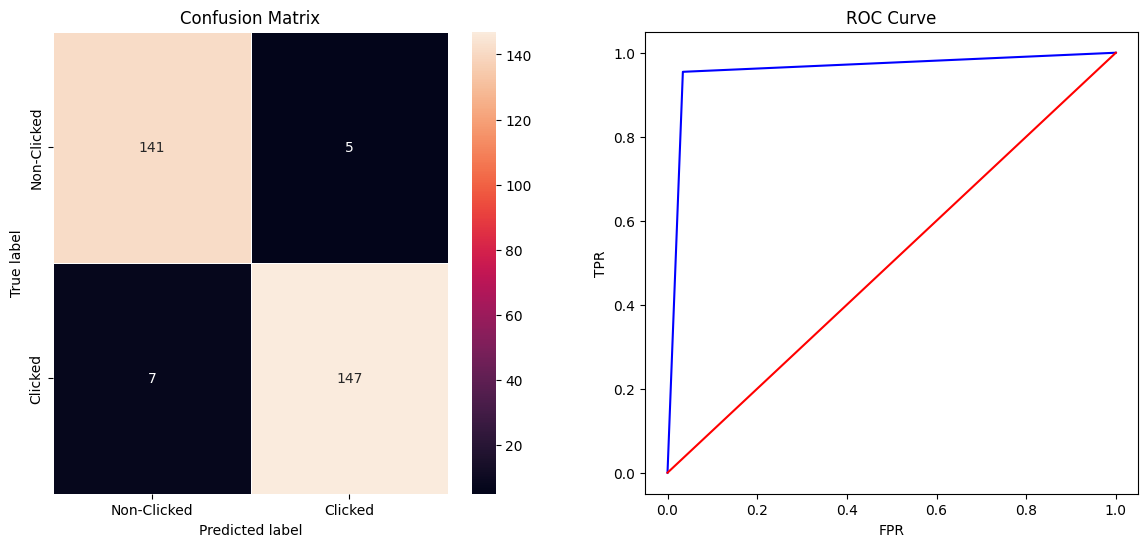

<Figure size 600x400 with 0 Axes>

In [44]:
abd = AdaBoostClassifier(random_state=42)
abd.fit(X_train,y_train)
y_pred = abd.predict(X_test)
# Evaluasi Model 
classification_rep = classification_report(y_test, y_pred)

# menampilkan hasil 
print('Confusion Matrik: ')
print(confusion_mat)
print("--------------------------------------------------------------------")
print('Acccuracy:', accuracy_score(y_pred,y_test))
print()
print(classification_rep)

ConfMatrik = confusion_matrix(y_test, y_pred) 
print(f'Confusion Matrik :')
print(ConfMatrik)

# Plotting Confusion Matrix and ROC curve
f,ax =  plt.subplots(1,2,figsize=(14,6))
plt.figure(figsize=(6,4))
ConfMatrik = confusion_matrix(y_test, y_pred) 
sns.heatmap(ConfMatrik,annot=True, fmt="d", 
            xticklabels = ['Non-Clicked', 'Clicked'], 
            yticklabels = ['Non-Clicked', 'Clicked'],linewidths=.5,ax = ax[0])
ax[0].set_ylabel('True label')
ax[0].set_xlabel('Predicted label')
ax[0].set_title('Confusion Matrix')

global fpr,tpr,thresholds
fpr,tpr,thresholds = roc_curve(y_test, y_pred)
ax[1].plot(fpr,tpr,color = 'blue')
ax[1].plot(fpr,fpr,color = 'r')
ax[1].set_ylabel('TPR')
ax[1].set_xlabel('FPR')
ax[1].set_title('ROC Curve')

plt.show()


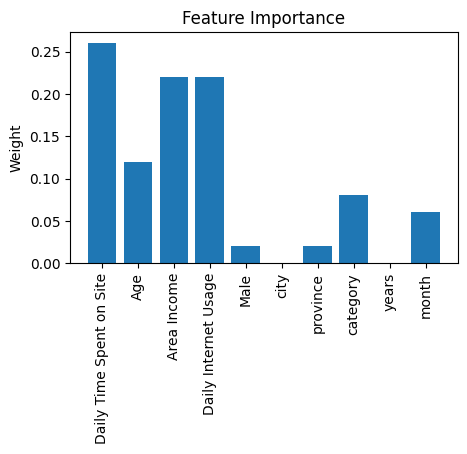

In [45]:
# Menghitung feature importance
features = X.columns
importances = abd.feature_importances_

# Membuat plot bar untuk feature importance
plt.figure(figsize=(5, 3))
plt.bar(features, importances)
plt.xticks(rotation=90)
plt.ylabel('Weight')
plt.title('Feature Importance')

plt.show()

### Kesimpulan <br>
    Hasil akhir dari confusion metrik dan feature important saya mengasumsikan untuk memilih algoritma permodelan AdaBoost dikarenakan hasil dari prediksi ML lebih baik. Dimana saya lebih berfokus pada nilai accurasi dan F1 Score. Kenapa F1 Score karena saya ingin meminimalisir False Positif(dipredik mengklik iklan actualnya tidak) dan False negatif(dipredik tidak mengklik iklan actulanya mengklik iklan).Dikarenakan model terbaik adalah Adaboost maka feature importan dari AdaBoost terdapat 4 feature yang paling berpengaruh yaitu Daily time spent on site,Age, Area Income dan Daily intenet usage dan hasil sesuai dengan analisa EDA diawal pemodelan.

### Save Model

In [ ]:
import pickle

# Menyimpan model ke dalam file
filename = 'model_AdaBoost.sav'
pickle.dump(abd, open(filename, 'wb'))

# Beberapa saat kemudian...

# Memuat model dari disk
loaded_model = pickle.load(open(filename, 'rb'))